In [1]:
"""
Created on Tue Jun 21 15:14:15 2016

@author: harrison

Code used to perform the research described in Gray et al. (2017).
In this code, we use the Landlab modeling toolkit to simulates a landscape
undergoing continuum off-fault deformation.

The landscape is created by uplifting a uniform block 600 meters wide by 1000
meters long and then eroding the landscape using linear diffusion to simulate
hillslope sediment transport and a "fastscape" eroder to simulate sediment
transport by rivers.

The tectonic deformation is performed using a exponential shaped velocity
profile. This is performed in the code by "accumulating" tectonic displacement
until the offset is greater than a pixel. At this point, the row of pixels is
shifted over by 1 pixel and any pixels moved outside of the domain are
duplicated on the other end.

Running this code will generate the landscape and output a plot of the
landscape at regular time intervals. Each parameter in the code is commented
with its physical analog and units are given in square brackets. The main weird
unit is I have time units in kiloyears (kyr) instead of just years. This is
just because it removes a lot of excess zeros. It also feels like landlab runs
faster with less zeros in the numbers but I think that is psychosomatic.

Gray, H. J., Shobe, C. M., Hobley, D. E., Tucker, G. E., Duvall, A. R.,
Harbert, S. A., & Owen, L. A. (2017). Off-fault deformation rate along the
southern San Andreas fault at Mecca Hills, southern California, inferred from
landscape modeling of curved drainages. Geology.

"""

## First, we initialize the code by importing python libraries. ###############

import numpy as np # numerical python
import matplotlib.pyplot as plt # matplotlib plotting functions

from landlab import RasterModelGrid #landlab raster grid
from landlab.plot import imshow_grid #landlab plotting function

from landlab.components import (LinearDiffuser, #Hillslopes
                                FlowRouter, # Flow accumulation
                                FastscapeEroder, #river erosion
                                DepressionFinderAndRouter) # lake filling

In [2]:
## Second, let's build the landlab grid we will build our landscape on. #######

# Set Domain size and parameters #

xmax = 1000 # length of the domain [meters]
ymax = 600 # width of the domain [meters]
dxy = 20 # pixel size as the length of one side [meters]
ncols = int(3*xmax/dxy) # number of columns, tripled for looped boundaries
nrows = int(ymax/dxy) # number of rows

# Build the landlab grid #
rmg = RasterModelGrid((nrows,ncols),dxy) # build a landlab grid of nrows x ncols

#set boundary conditions to have top closed and all others open
rmg.set_closed_boundaries_at_grid_edges(False,True,False,False)

# Add an elevation field + slope and noise to get the flow router started
rmg.add_zeros('node','topographic__elevation')
rmg['node']['topographic__elevation'] += (rmg.node_y*0.1 +
                                          np.random.rand(nrows*ncols))

In [3]:
## Third, we now set parameters to control and build our landscape ############

# Erosion variables #
K = 0.08 # value for the "erodability" of the landscape bedrock [kyr^-1]
m = 0.5 # exponent on drainage area [non dimensional]
n = 1 # exponent on river slope [non dimensional]
D = 0.02 # Hillslope linear diffusivity [meters sqared per kiloyear]

# Tectonic variables #
uplift_rate = 1.8 # uplft rate of the landscape [meters per kiloyear]
vmax = 6.0 # maximum off fault deformation rate [meters per kiloyear]
v_star =150. # e-folding lengthscale for the deformation profile [meters]

# Model miscellaneous variables ##
total_time = 700 # Maximum time the simulation can run for [kyr]
shear_start = 200 # Time to start the off-fault deformation [kyr]
dt = 1.0 #time_step of the for loop [kyr]

current_time = 0 # time tracking variable [kyr]
i = 0 # iteration tracker [integer]
plot_num = 100 # number of iterations to run before each new plot
calculate_BR = False # calculate the metric BR used in the main paper

In [4]:
## Fourth, the fun part, set up the off-fault deformation profile #############

# Velocity profile. Here we use an exponential function to describe the lateral
# deformation with distance from the fault.
v_profile = vmax*np.exp(-np.arange(0.,nrows)/(v_star/dxy))

# because the grid is discretized into pixels, we need to count how much
# deformation has occurred over a timestep and move a pixel after the
# accumulated deformation is larger than than the pixel length
accum_disp = float(dxy)*np.exp(-np.arange(0.,nrows)/(v_star/dxy))

# This is an array for counting how many pixels need to be moved
nshift = np.zeros(np.size(np.arange(0.,nrows)))
n_buff=0 # optional extra buffer zone incase you only want to move a subset.

In [5]:
## Last, we instantiate landlab components that will evolve the landscape #####

fr = FlowRouter(rmg) # standard D8 flow routing algorithm
sp = FastscapeEroder(rmg, K_sp=K,m_sp=m,n_sp=n,threshold_sp=0) # river eroder
lin_diffuse = LinearDiffuser(rmg, linear_diffusivity=D) #linear diffuser
fill = DepressionFinderAndRouter(rmg) #lake filling algorithm


start for loop


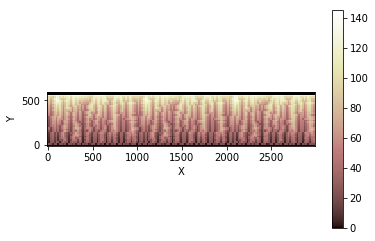

Current time = 205.95000000000113


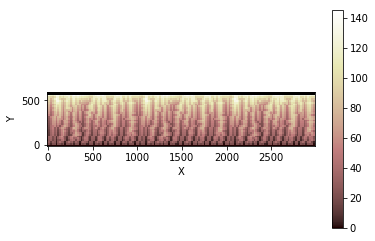

Current time = 210.95000000000226


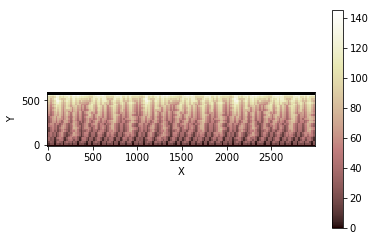

Current time = 215.9500000000034


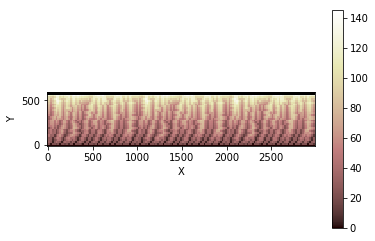

Current time = 220.95000000000454


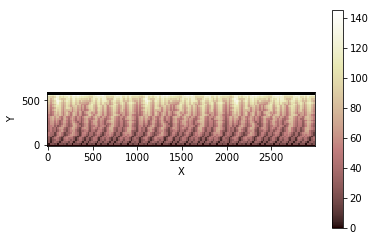

Current time = 225.95000000000567


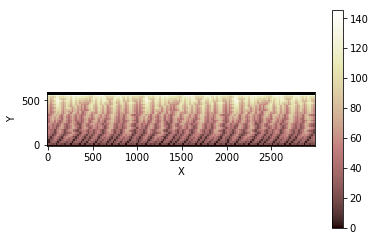

Current time = 230.9500000000068


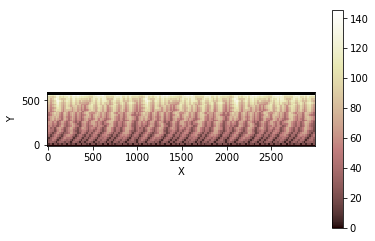

Current time = 235.95000000000795


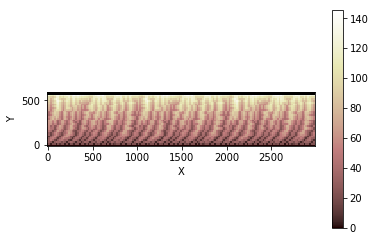

Current time = 240.95000000000908


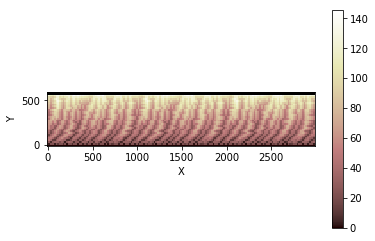

Current time = 245.95000000001022


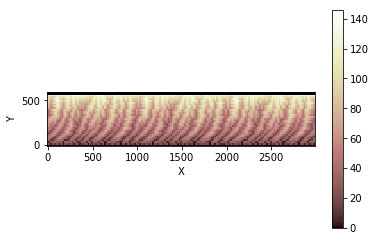

Current time = 250.95000000001136


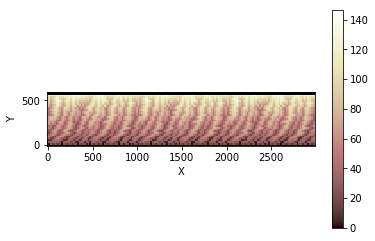

Current time = 255.9500000000125


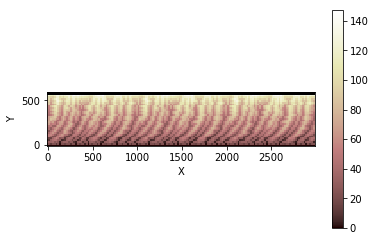

Current time = 260.95000000001363


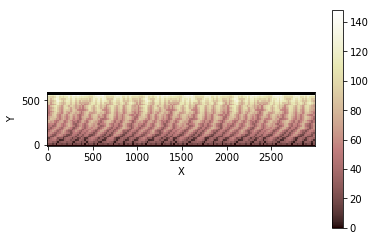

Current time = 265.95000000001477


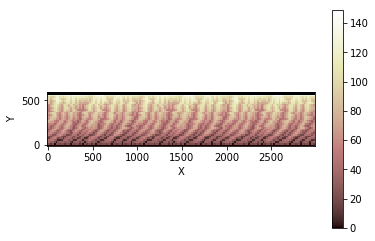

Current time = 270.9500000000159


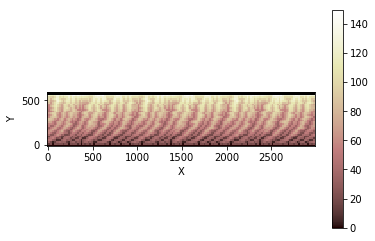

Current time = 275.95000000001704


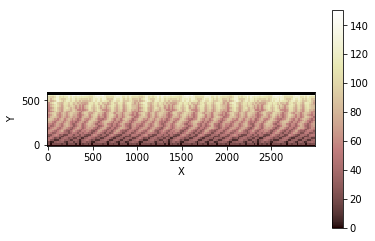

Current time = 280.9500000000182


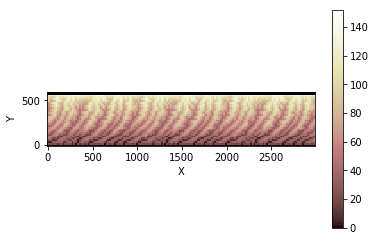

Current time = 285.9500000000193


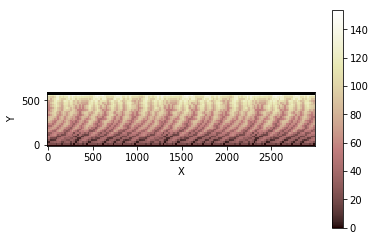

Current time = 290.95000000002045


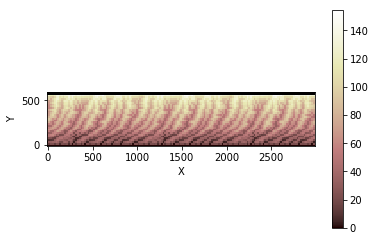

Current time = 295.9500000000216


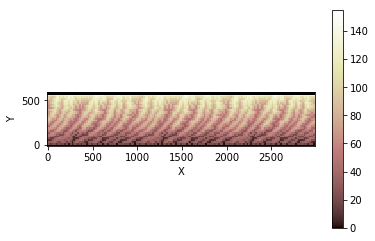

Current time = 300.9500000000227


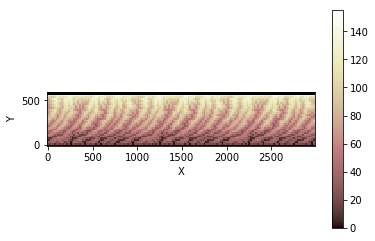

Current time = 305.95000000002386


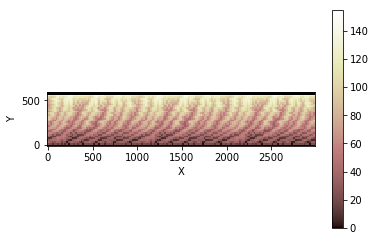

Current time = 310.950000000025


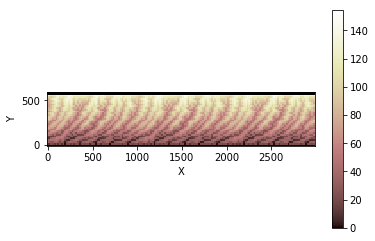

Current time = 315.95000000002614


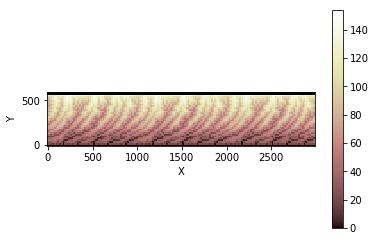

Current time = 320.9500000000273


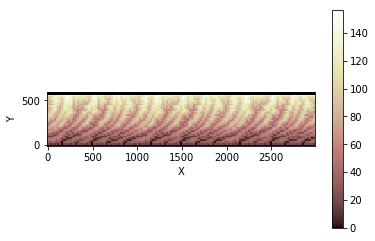

Current time = 325.9500000000284


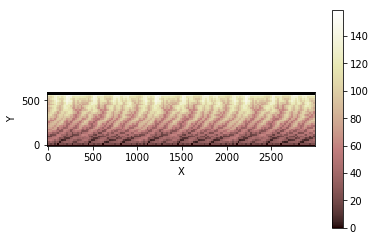

Current time = 330.95000000002955


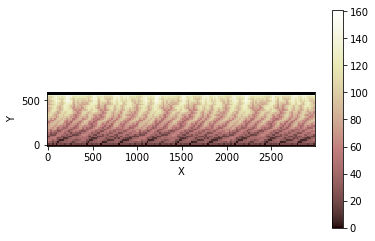

Current time = 335.9500000000307


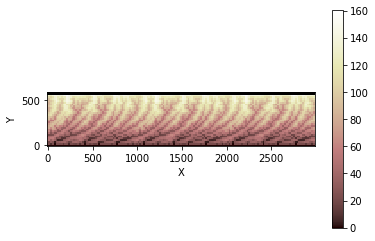

Current time = 340.9500000000318


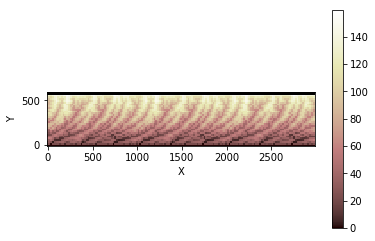

Current time = 345.95000000003296


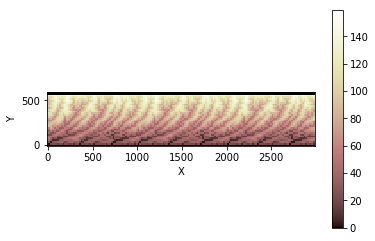

Current time = 350.9500000000341


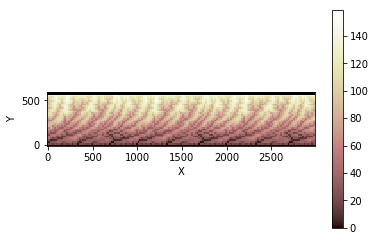

Current time = 355.95000000003523


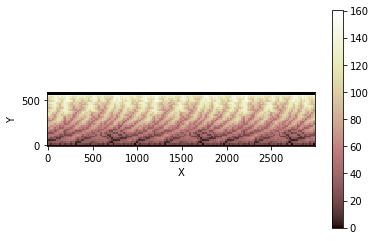

Current time = 360.95000000003637


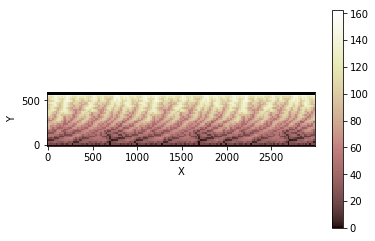

Current time = 365.9500000000375


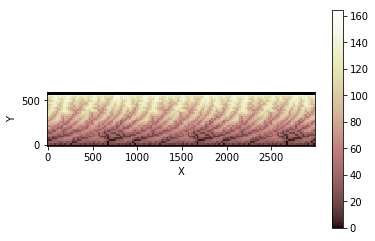

Current time = 370.95000000003864


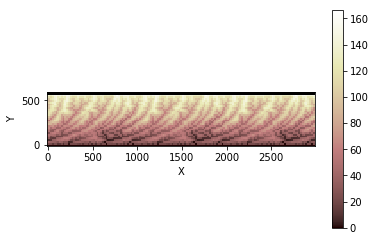

Current time = 375.9500000000398


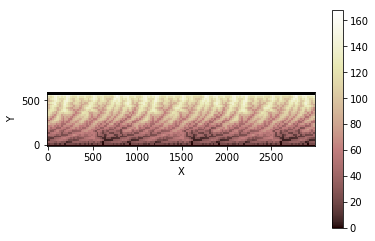

Current time = 380.9500000000409


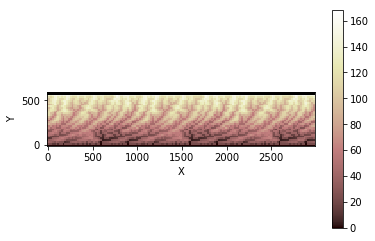

Current time = 385.95000000004205


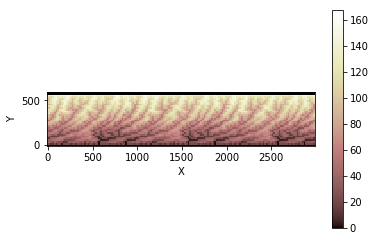

Current time = 390.9500000000432


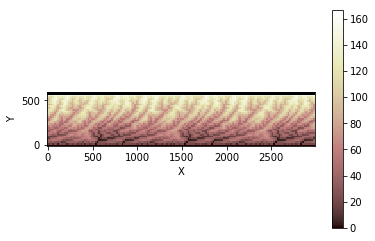

Current time = 395.9500000000443


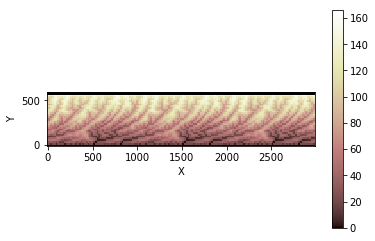

Current time = 400.95000000004546


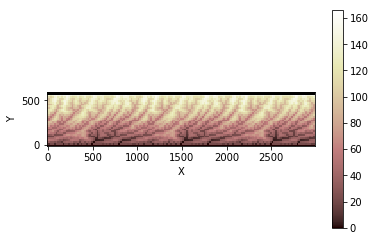

Current time = 405.9500000000466


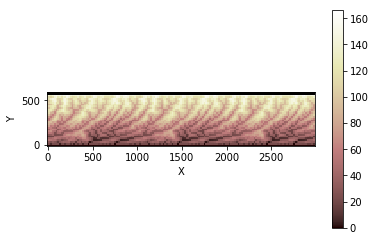

Current time = 410.95000000004774


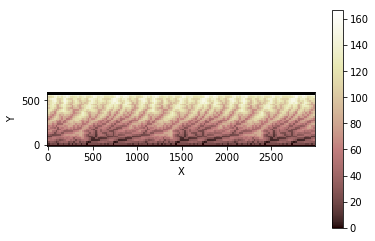

Current time = 415.9500000000489


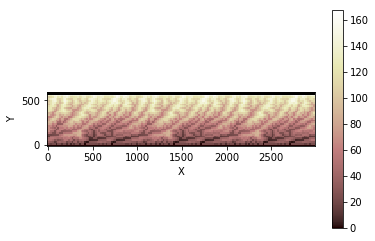

Current time = 420.95000000005


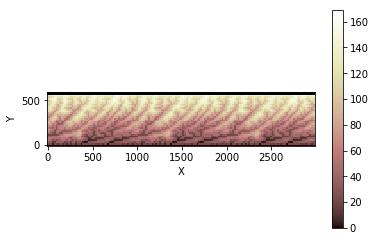

Current time = 425.95000000005115


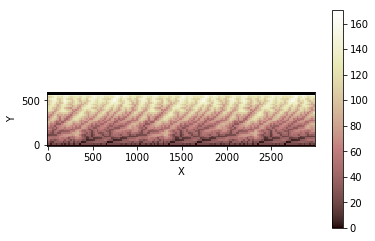

Current time = 430.9500000000523


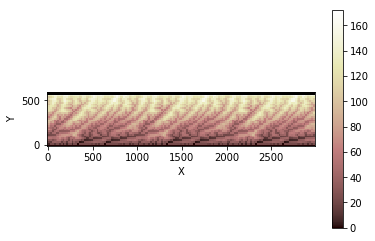

Current time = 435.9500000000534


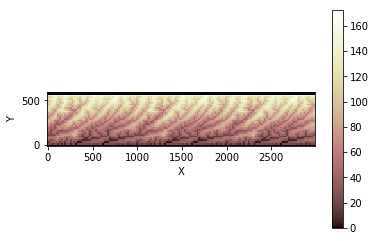

Current time = 440.95000000005456


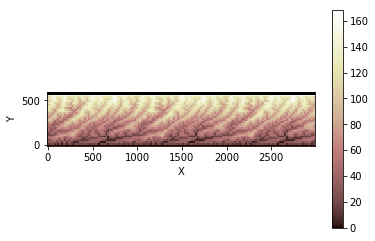

Current time = 445.9500000000557


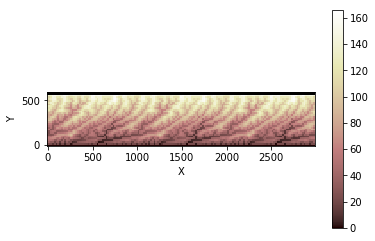

Current time = 450.95000000005683


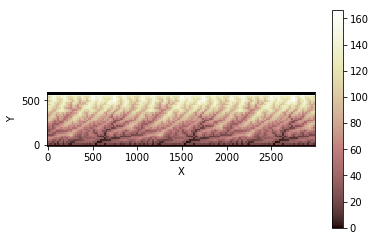

Current time = 455.95000000005797


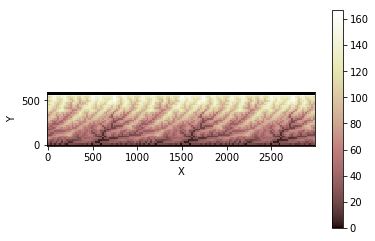

Current time = 460.9500000000591


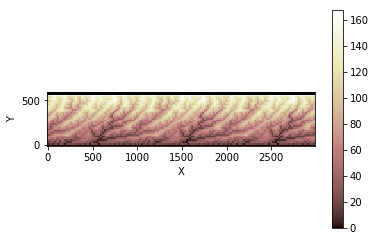

Current time = 465.95000000006024


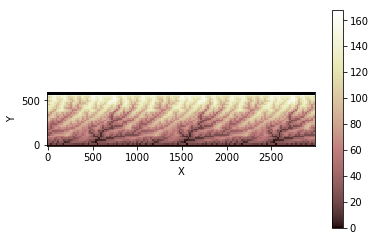

Current time = 470.9500000000614


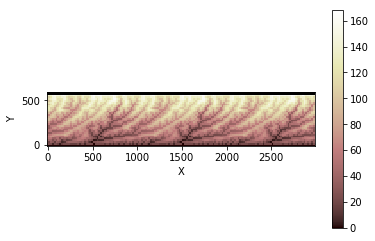

Current time = 475.9500000000625


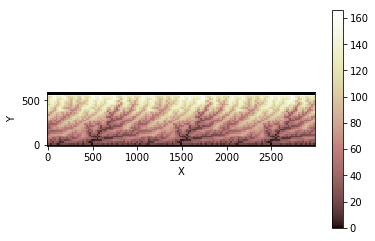

Current time = 480.95000000006365


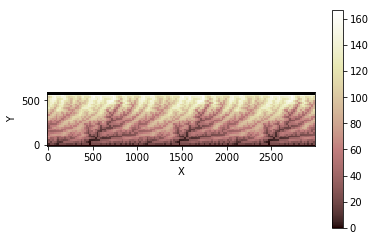

Current time = 485.9500000000648


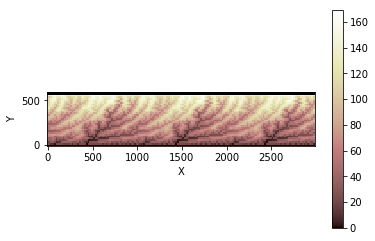

Current time = 490.9500000000659


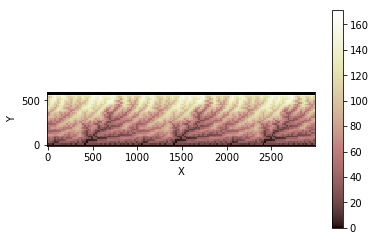

Current time = 495.95000000006706


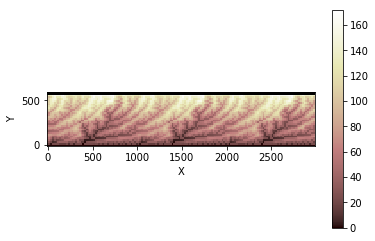

Current time = 500.9500000000682


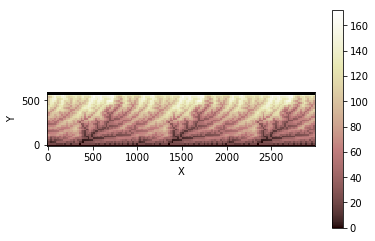

Current time = 505.95000000006934


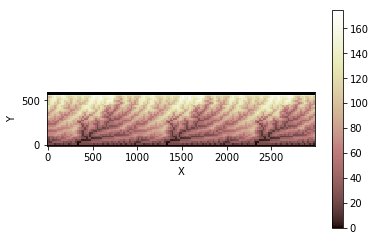

Current time = 510.9500000000705


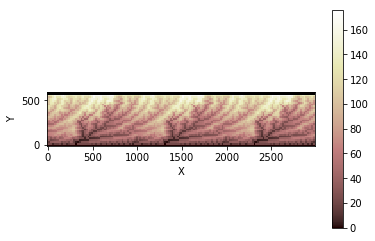

Current time = 515.9500000000671


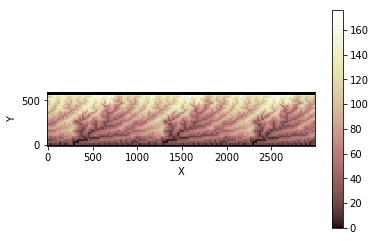

Current time = 520.9500000000626


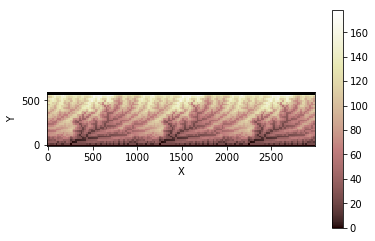

Current time = 525.950000000058


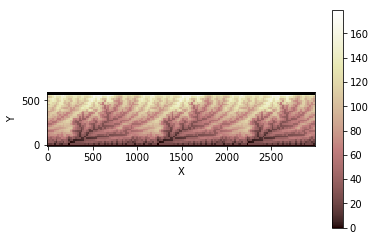

Current time = 530.9500000000535


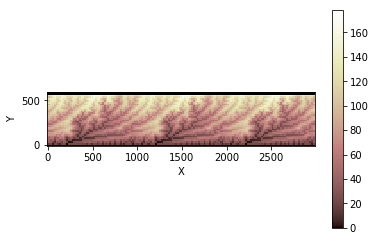

Current time = 535.9500000000489


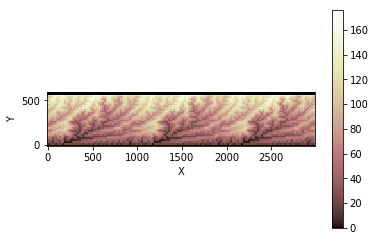

Current time = 540.9500000000444


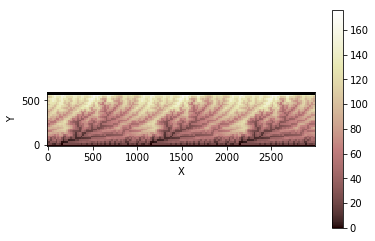

Current time = 545.9500000000398


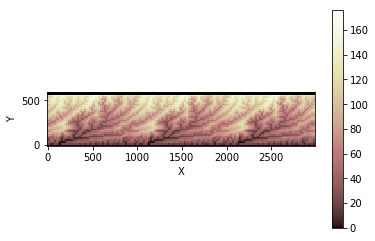

Current time = 550.9500000000353


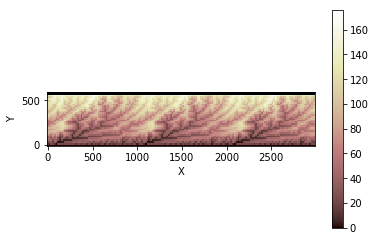

Current time = 555.9500000000307


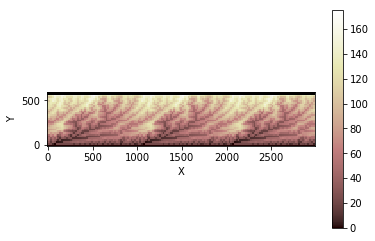

Current time = 560.9500000000262


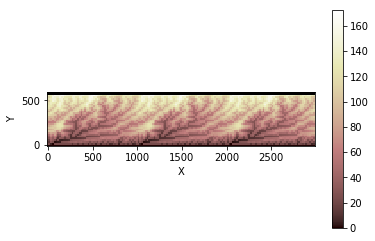

Current time = 565.9500000000216


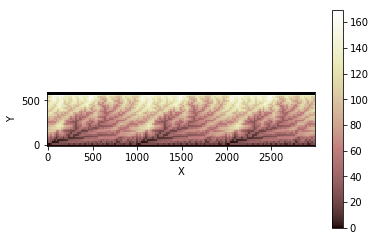

Current time = 570.9500000000171


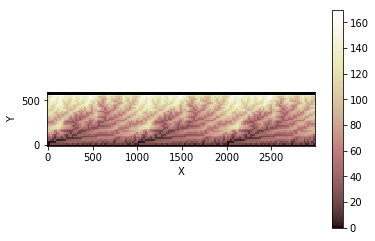

Current time = 575.9500000000126


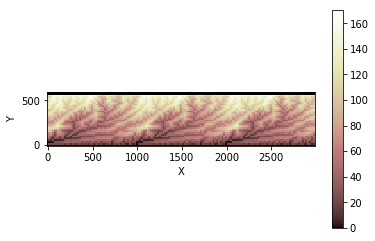

Current time = 580.950000000008


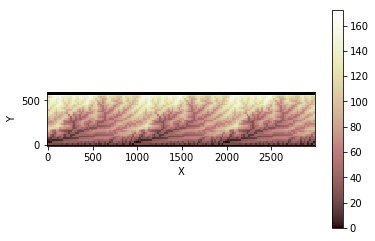

Current time = 585.9500000000035


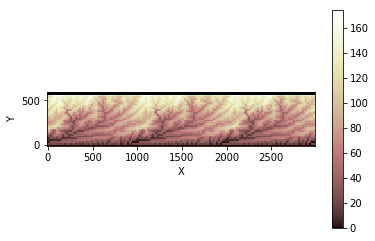

Current time = 590.9499999999989


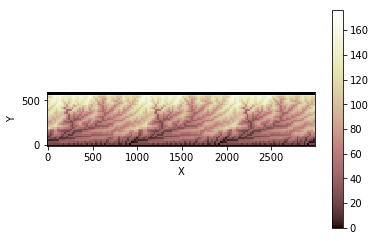

Current time = 595.9499999999944


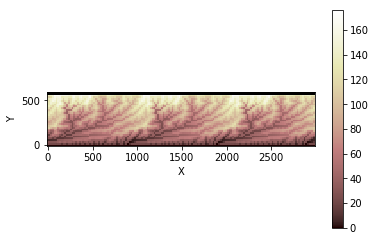

Current time = 600.9499999999898


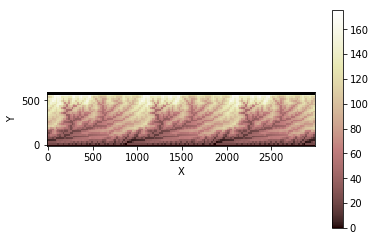

Current time = 605.9499999999853


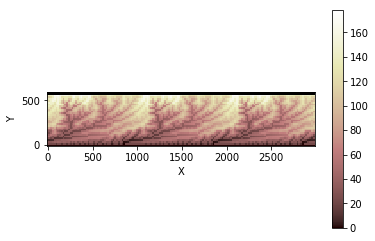

Current time = 610.9499999999807


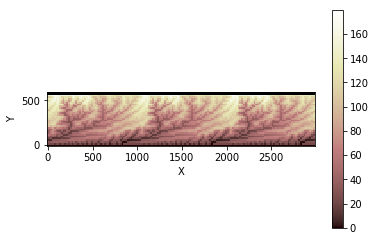

Current time = 615.9499999999762


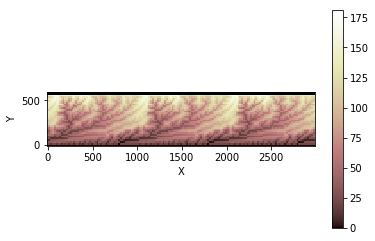

Current time = 620.9499999999716


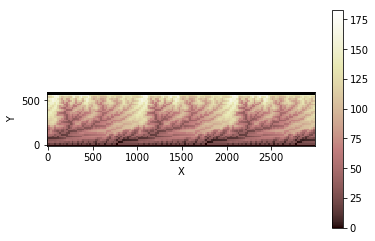

Current time = 625.9499999999671


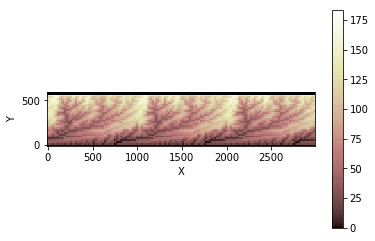

Current time = 630.9499999999625


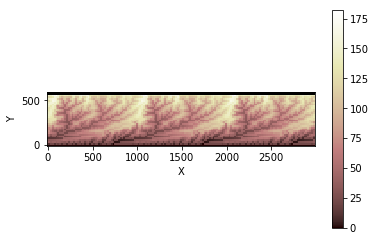

Current time = 635.949999999958


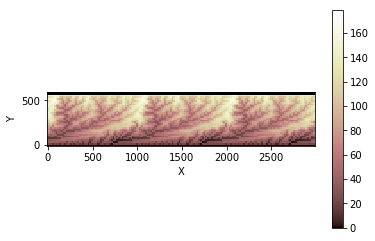

Current time = 640.9499999999534


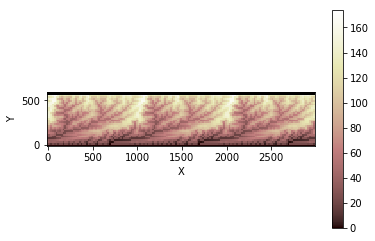

Current time = 645.9499999999489


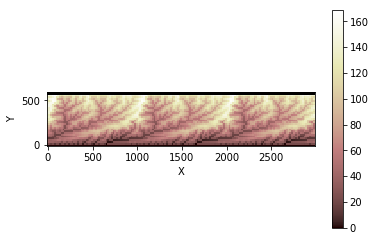

Current time = 650.9499999999443


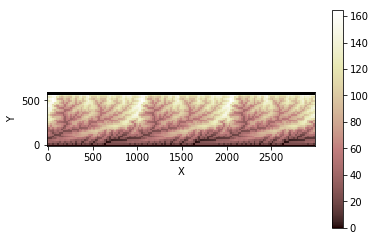

Current time = 655.9499999999398


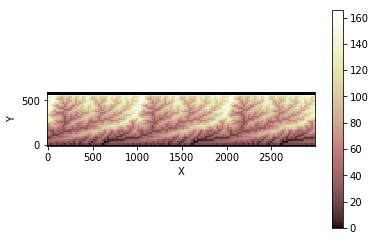

Current time = 660.9499999999352


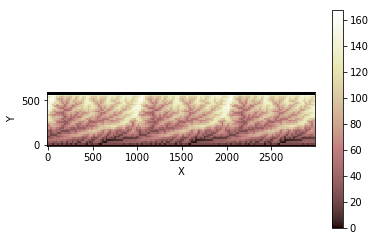

Current time = 665.9499999999307


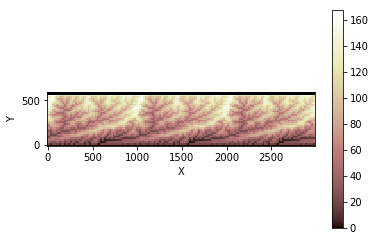

Current time = 670.9499999999261


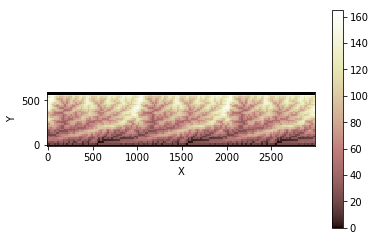

Current time = 675.9499999999216


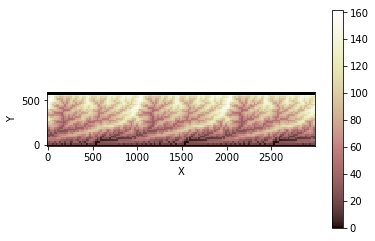

Current time = 680.949999999917


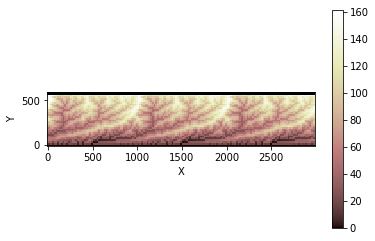

Current time = 685.9499999999125


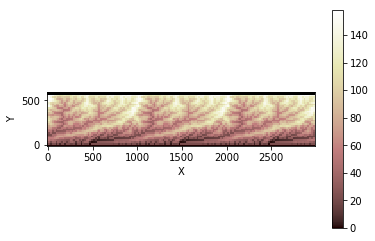

Current time = 690.949999999908


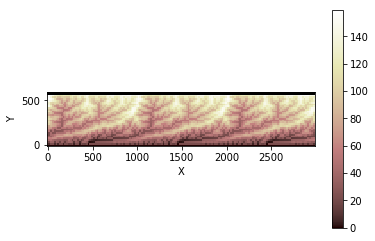

Current time = 695.9499999999034
For loop complete


In [19]:
## Now that all parameters and landlab components are set, run the loop #######

print('start for loop')

while (current_time <= total_time):

    ## Looped boundary conditions ##

    # Because the landlab flow router isn't currently set up to use looped
    # boundary conditions, I simulated them here by duplicating the landscape
    # to the left and right such that the flow accumulator would 'see' the
    # the appropriate amount of upstream drainage area.
    
    rmg['node']['topographic__elevation'][(rmg.node_x<ncols*dxy/3)] = (
     rmg['node']['topographic__elevation'][(rmg.node_x>=ncols*dxy/3) &
     (rmg.node_x<2*ncols*dxy/3)])

    rmg['node']['topographic__elevation'][(rmg.node_x>=2*ncols*dxy/3)] = (
      rmg['node']['topographic__elevation'][(rmg.node_x>=ncols*dxy/3) &
      (rmg.node_x<2*ncols*dxy/3)])

    ## Tectonic off-fault deformation ##

    # To simulate off fault lateral displacement/deformation, we apply a
    # lateral velocity profile. This is done by taking the landlab elevations

    if (current_time>shear_start):

      dt = 0.05 # First set a lower timestep to keep it stable

      # Take the landlab grid elevations and reshape into a box nrows x ncols
      elev = rmg['node'][ 'topographic__elevation']
      elev_box = np.reshape(elev, [nrows,ncols])

      # Calculate the offset that has accumulated over a timestep
      accum_disp += v_profile*dt;

      # now scan up the landscape row by row looking for offset
      for r in range(nrows):

        # check if the accumulated offset for a row is larger than a pixel
        if accum_disp[r] >= dxy:

          # if so, count the number of in the row pixels to be moved
          nshift[r] = int(np.floor(accum_disp[r]/dxy))

          # copy which pixels will be moved off the grid by displacement
          temp = elev_box[r,n_buff:int(nshift[r])+n_buff]

          # move the row over by the number of pixels of accumulated offset
          elev_box[r,n_buff:((ncols-n_buff)-int(nshift[r]))] = \
                                      elev_box[r,int(nshift[r])+n_buff:ncols-n_buff]

          # replace the values on the right side by the ones from the left
          elev_box[r,((ncols)-int(nshift[r])):ncols] = temp

          # last, subtract the offset pixels from the accumulated displacement
          accum_disp[r] -= dxy

      #This section is if you select a middle section to be moved independently
      elev_box[:,(ncols-n_buff):ncols]=elev_box[:,n_buff:(2*n_buff)]
      elev_box[:,0:n_buff] = elev_box[:,ncols-2*n_buff:ncols-n_buff]

      # Finally, reshape the elevation box into an array and feed to landlab
      elev_new = np.reshape(elev_box, nrows*ncols)
      rmg['node']['topographic__elevation'] = elev_new


    ## Landscape Evolution ##

    # Now that we have performed the tectonic deformation, lets apply our
    # landscape evolution and watch the landscape change as a result.

    # Uplift the landscape
    rmg['node']['topographic__elevation'][rmg.core_nodes] += uplift_rate*dt

    # set the lower boundary as fixed elevation
    rmg['node']['topographic__elevation'][rmg.node_y==0] = 0

    # Diffuse the landscape simulating hillslope sediment transport
    lin_diffuse.run_one_step(dt)

    # Accumulate and route flow, fill any lakes, and erode under the rivers
    fr.run_one_step() # route flow
    DepressionFinderAndRouter.map_depressions(fill) # fill lakes
    sp.run_one_step(dt) # fastscape stream power eroder


    ## Calculate the geomorphic metric ##

    # In the paper, we use a geomorphic metric, BR, to quantify the
    # reorientation of the channels as time goes on. The code to calculate this
    # value is below but turned off as it can slow the model. Set the
    # 'calculate_BR' variable to 'True' if you want to calculate it.

    if calculate_BR:

      aspects = rmg.calc_aspect_at_node() # measure pixel aspect

      # classify and count the number of pixels with certain directions
      asp_0_45 = float(np.logical_and(aspects>=0,aspects<=45).sum())
      asp_45_135 = float(np.logical_and(aspects>45,aspects<=135).sum())
      asp_135_225 = float(np.logical_and(aspects>135,aspects<=225).sum())
      asp_225_315 = float(np.logical_and(aspects>225,aspects<=315).sum())
      asp_315_360 = float(np.logical_and(aspects>315,aspects<=360).sum())

      # Calculate BR from Gray et al. (2017)
      BR = (asp_0_45 + asp_315_360 + asp_135_225)/(asp_45_135 + asp_225_315)

    ## Plotting ##

    if i % plot_num == 0:

      # Use landlab plotting function to plot the landscape
      imshow_grid(rmg,'topographic__elevation',show_elements=False)
      plt.show()
      plt.clf
      print('Current time = ' + str(current_time)) # show current time

    current_time += dt # update time tracker

    i += 1 # update iteration variable

print('For loop complete')
